<a href="https://colab.research.google.com/github/Sam-Huin/atom/blob/master/Capstone_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install scrapy
#!pip install hvplot
#!pip install -U bokeh

In [1]:
#libraries import
#import holoviews as hv
#hv.extension('bokeh')
#import hvplot.pandas
import pandas as pd, numpy as np
import requests
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import io
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
from keras import optimizers
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#from sklearn.model_selection import train_test_split
#from bs4 import BeautifulSoup
#from scrapy.selector import Selector
#from scrapy.http import HtmlResponse
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Using TensorFlow backend.


In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.options.plotting.backend = 'hvplot'

In [4]:
#url = 'https://raw.git.generalassemb.ly/samuel-huin/classes/master/A%20CapstonE/datasets/bitcoin_3hrs?token=AABctR3oHvC84GCBK0-gRJOSlOdZxgPNks5eEOY5wA%3D%3D'
#pd_btc = pd.read_csv(url)    #getting dataset from GitHub URL
#pd_btc = pd.read_csv('./datasets/bitcoin_3hrs')    #getting csv from local machine

from google.colab import files
uploaded = files.upload()

Saving bitcoin_hourly.csv to bitcoin_hourly.csv


In [5]:
# Dataset is now stored in a Pandas Dataframe
pd_btc = pd.read_csv(io.BytesIO(uploaded['bitcoin_hourly.csv']))
pd_btc.shape

(24194, 6)

In [0]:
pd_btc['Date_Time'] = pd.to_datetime(pd_btc['Date_Time'])
pd_btc.set_index('Date_Time', inplace=True)
pd_btc.sort_index(inplace=True)

In [7]:
pd_btc.dtypes

Open      float64
Close     float64
High      float64
Low       float64
Volume    float64
dtype: object

In [8]:
pd_btc.head()

,Open,Close,High,Low,Volume
Date_Time,,,,,
2017-01-01 00:00:00,966.61,967.00,967.79,965.00,95.564614
2017-01-01 01:00:00,967.00,965.50,967.25,965.50,60.662494
2017-01-01 02:00:00,965.59,965.00,966.59,965.00,69.840147
2017-01-01 03:00:00,965.01,964.49,965.01,963.16,56.699787
2017-01-01 04:00:00,963.84,962.60,963.90,961.26,80.570159


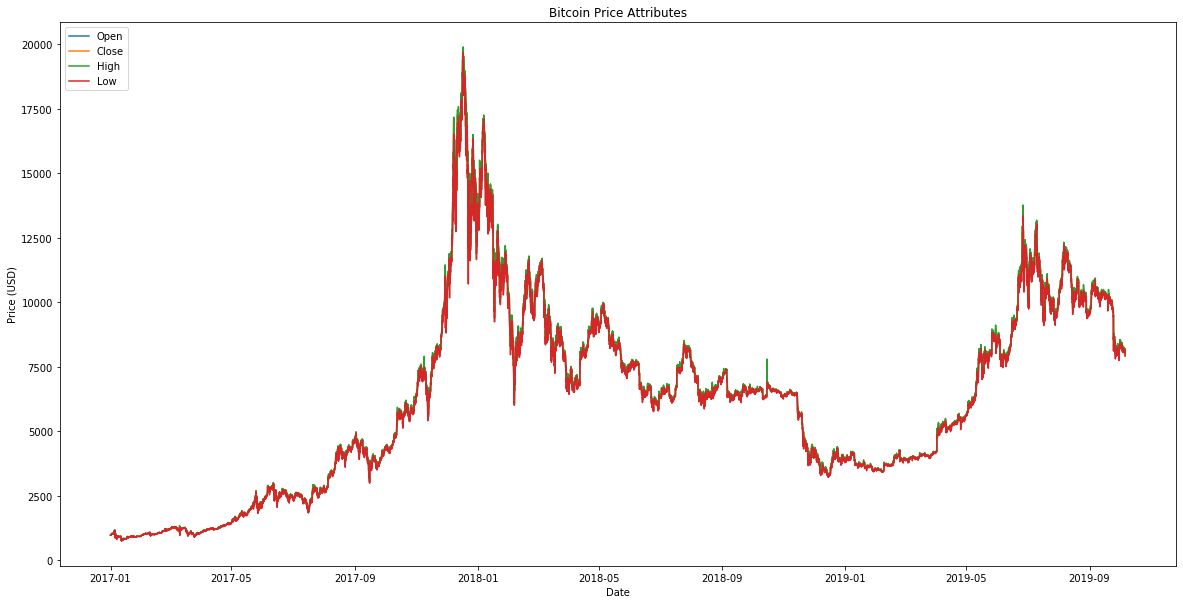

In [9]:
#plotting of prices attributes

plt.figure(figsize=(20, 10))
plt.plot(pd_btc['Open'])
plt.plot(pd_btc['Close'])
plt.plot(pd_btc['High'])
plt.plot(pd_btc['Low'])
plt.title('Bitcoin Price Attributes')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend(['Open','Close','High','Low'], loc='upper left')
plt.show()

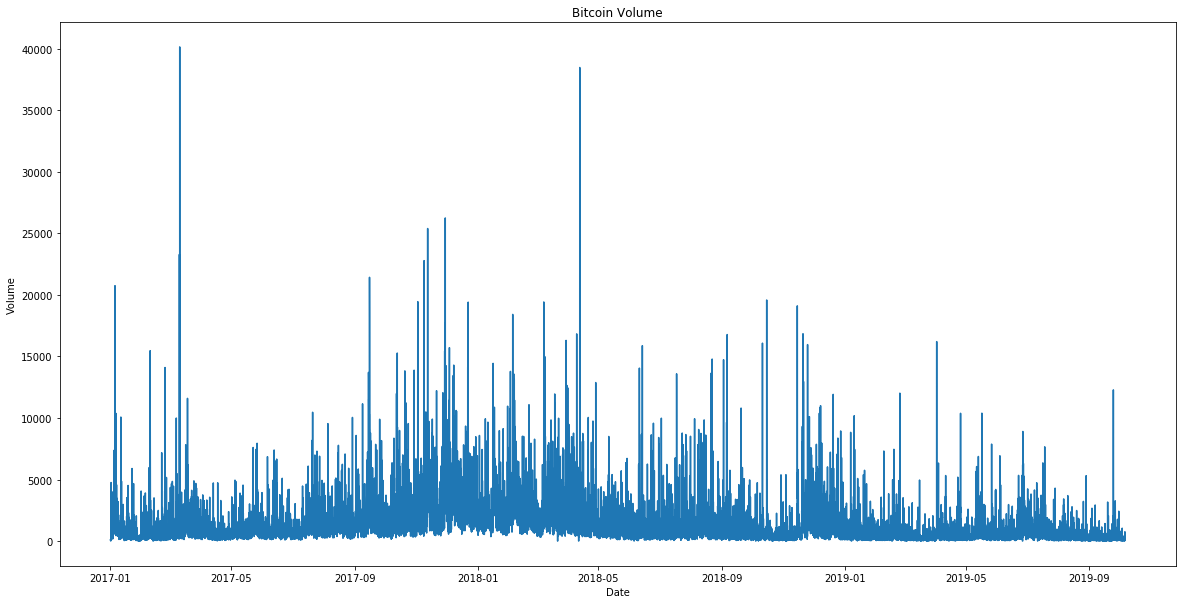

In [10]:
#plotting of Bitcoin volume

plt.figure(figsize=(20, 10))
plt.plot(pd_btc['Volume'])
plt.title('Bitcoin Volume')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()

In [0]:
pd_btc['High_Low'] = pd_btc['High'] - pd_btc['Low']
pd_btc['High_Open'] = pd_btc['High'] - pd_btc['Open']
pd_btc['Low_Open'] = pd_btc['Open'] - pd_btc['Low']

In [0]:
def count_tr(df):
    list_num = []
    for i in range(len(df)):
        if df.iloc[i]['High'] > df.iloc[i]['Open']:
          list_num.append(df.iloc[i]['High_Open'] + df.iloc[i]['Low_Open'])                           
        else:
          list_num.append(df.iloc[i]['High_Low'])
    return list_num

In [0]:
def bull_bear(df):
  list_bullbear = []
  for i in range(len(df)):
    if df.iloc[i]['Close'] > df.iloc[i]['Open']:
      list_bullbear.append('Bull')
    else:
      list_bullbear.append('Bear')
  return list_bullbear      

In [0]:
pd_btc['TR'] = count_tr(pd_btc)
#pd_btc['Bull_Bear'] = bull_bear(pd_btc)

In [14]:
pd_btc.head(20)

,Open,Close,High,Low,Volume,High_Low,High_Open,Low_Open,TR
Date_Time,,,,,,,,,
2017-01-01 00:00:00,966.61,967.00,967.79,965.00,95.564614,2.79,1.18,1.61,2.79
2017-01-01 01:00:00,967.00,965.50,967.25,965.50,60.662494,1.75,0.25,1.50,1.75
2017-01-01 02:00:00,965.59,965.00,966.59,965.00,69.840147,1.59,1.00,0.59,1.59
2017-01-01 03:00:00,965.01,964.49,965.01,963.16,56.699787,1.85,0.00,1.85,1.85
2017-01-01 04:00:00,963.84,962.60,963.90,961.26,80.570159,2.64,0.06,2.58,2.64
2017-01-01 05:00:00,962.98,964.88,965.20,962.11,91.042053,3.09,2.22,0.87,3.09
2017-01-01 06:00:00,963.90,967.45,967.45,962.72,105.664480,4.73,3.55,1.18,4.73
2017-01-01 07:00:00,966.48,965.81,967.41,965.80,27.489011,1.61,0.93,0.68,1.61
2017-01-01 08:00:00,965.81,965.46,965.86,962.60,149.617696,3.26,0.05,3.21,3.26


In [0]:
pd_btc['Bull_Bear'].value_counts()

In [0]:
def plot_graph(line1, line2, label1=None, label2=None, title=None, lw=2):
    fig, ax = plt.subplots(1, figsize=(20, 10))
    #ax.xaxis_date()
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('USD($)', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='upper left', fontsize=16);

In [0]:
def plot_graph_2(line1, line2, line3, line4, label1, label2, label3, label4, title, lw=2):
    fig, ax1 = plt.subplots(1, figsize=(20, 10))
    #ax.xaxis_date()
    #ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.plot(line1, label=label1, linewidth=lw, color='blue')
    ax1.plot(line2, label=label2, linewidth=lw, color='orange')
    ax1.set_ylabel('USD($)', fontsize=14, color='blue')
    ax1.set_title(title, fontsize=16)
    
    ax2 = ax1.twinx()
    ax2.plot(line3, label=label3, linewidth=lw, color='green')
    ax2.plot(line4, label=label4, linewidth=lw, color='orange')
    ax2.set_ylabel('Volume', fontsize=14, color='green')
   
    ax1.legend(loc='upper left', fontsize=16);
    ax2.legend(loc='upper right', fontsize=16);

In [0]:
def train_test_split(df, test_size=0.2, shuffle=False):
  split = len(df) - int(len(df)*0.2)
  train_set = df[:split]
  test_set = df[split-1:]
  return train_set, test_set

In [18]:
train_set, test_set = train_test_split(pd_btc, test_size=0.2, shuffle=False)
print(pd_btc.shape)
print(train_set.shape)
print(test_set.shape)

(24194, 9)
(19356, 9)
(4839, 9)


In [19]:
train_set.tail()

,Open,Close,High,Low,Volume,High_Low,High_Open,Low_Open,TR
Date_Time,,,,,,,,,
2019-03-18 12:00:00,4056.0,4065.8,4071.5,4055.000000,58.938169,16.500000,15.5,1.000000,16.500000
2019-03-18 13:00:00,4065.1,4065.2,4065.8,4064.300000,98.631881,1.500000,0.7,0.800000,1.500000
2019-03-18 14:00:00,4065.2,4059.8,4065.3,4056.036081,106.133067,9.263919,0.1,9.163919,9.263919
2019-03-18 15:00:00,4059.7,4065.3,4065.3,4059.700000,89.662880,5.600000,5.6,0.000000,5.600000
2019-03-18 16:00:00,4065.2,4065.7,4065.8,4065.200000,100.874843,0.600000,0.6,0.000000,0.600000


In [20]:
test_set.head()

,Open,Close,High,Low,Volume,High_Low,High_Open,Low_Open,TR
Date_Time,,,,,,,,,
2019-03-18 16:00:00,4065.20000,4065.70000,4065.8,4065.2,100.874843,0.6,0.60000,0.00000,0.6
2019-03-18 17:00:00,4065.80000,4060.80000,4066.0,4056.5,101.701671,9.5,0.20000,9.30000,9.5
2019-03-18 18:00:00,4060.80000,4059.99783,4065.1,4059.2,157.851723,5.9,4.30000,1.60000,5.9
2019-03-18 19:00:00,4059.99783,4060.30000,4060.3,4059.9,34.645311,0.4,0.30217,0.09783,0.4
2019-03-18 20:00:00,4060.20000,4076.00000,4079.0,4060.2,158.374745,18.8,18.80000,0.00000,18.8


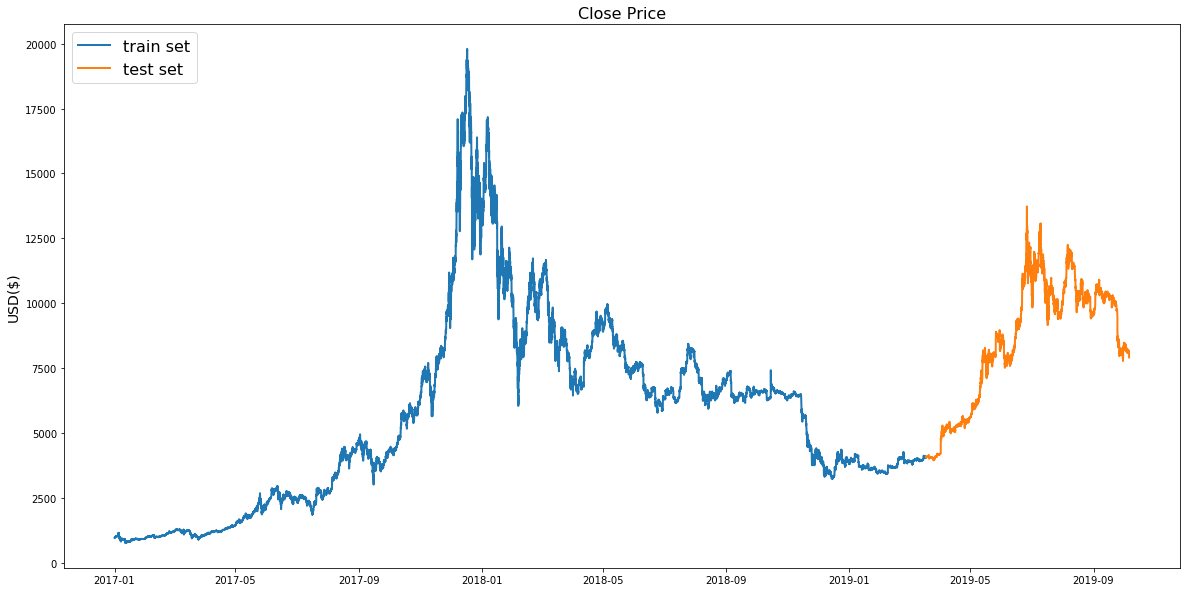

In [21]:
plot_graph(train_set['Close'], test_set['Close'], 'train set', 'test set', title='Close Price')

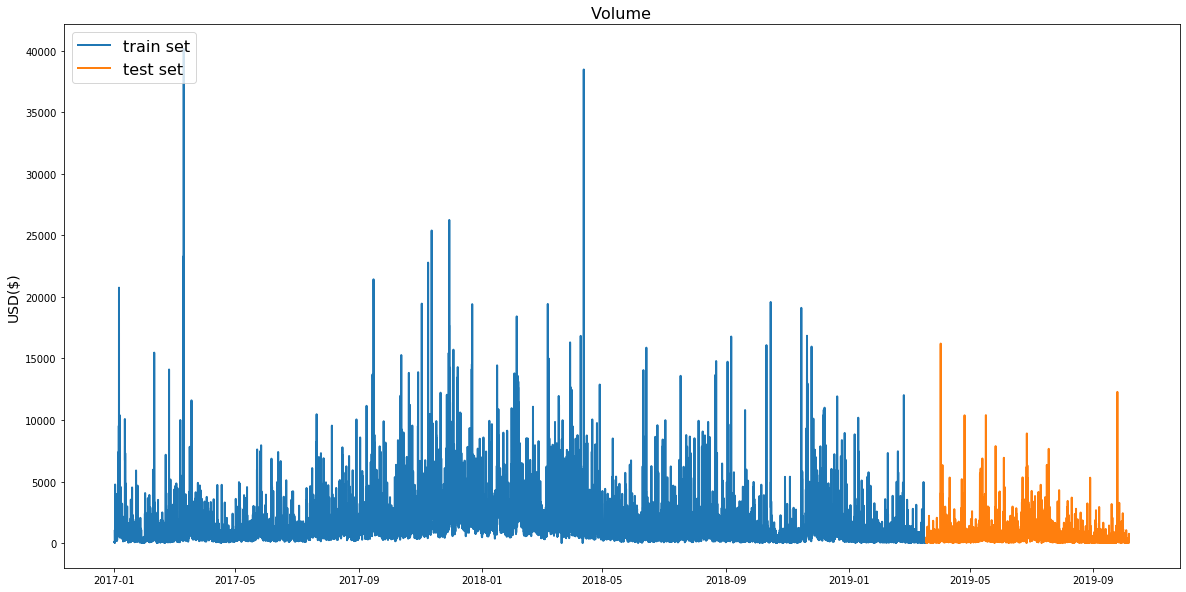

In [22]:
plot_graph(train_set['Volume'], test_set['Volume'], 'train set', 'test set', title='Volume')

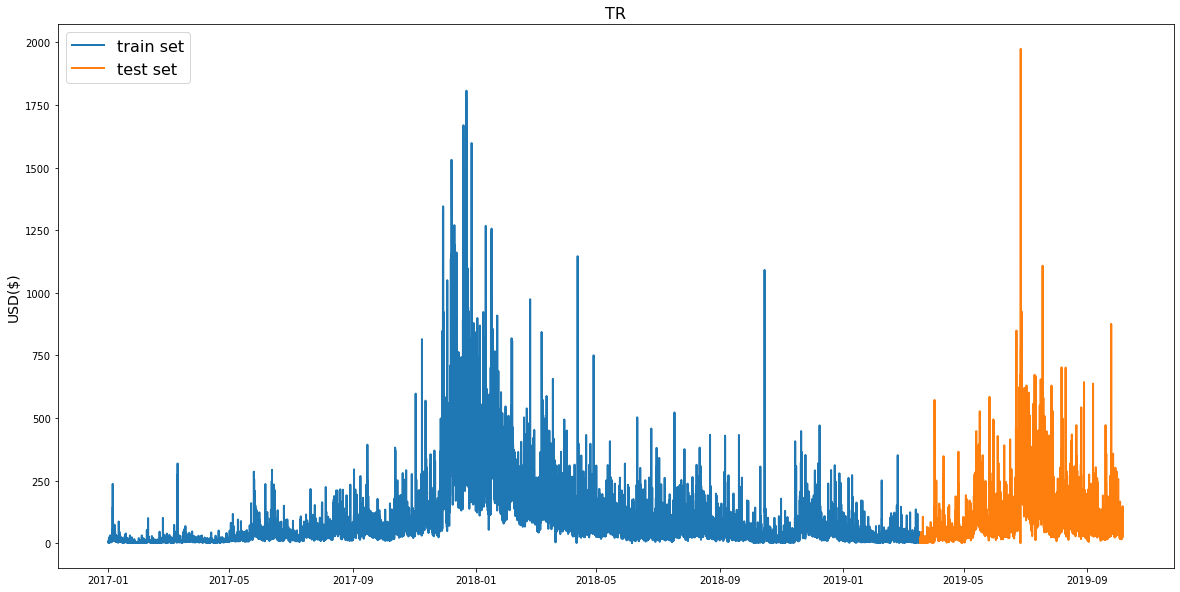

In [23]:
plot_graph(train_set['TR'], test_set['TR'], 'train set', 'test set', title='TR')

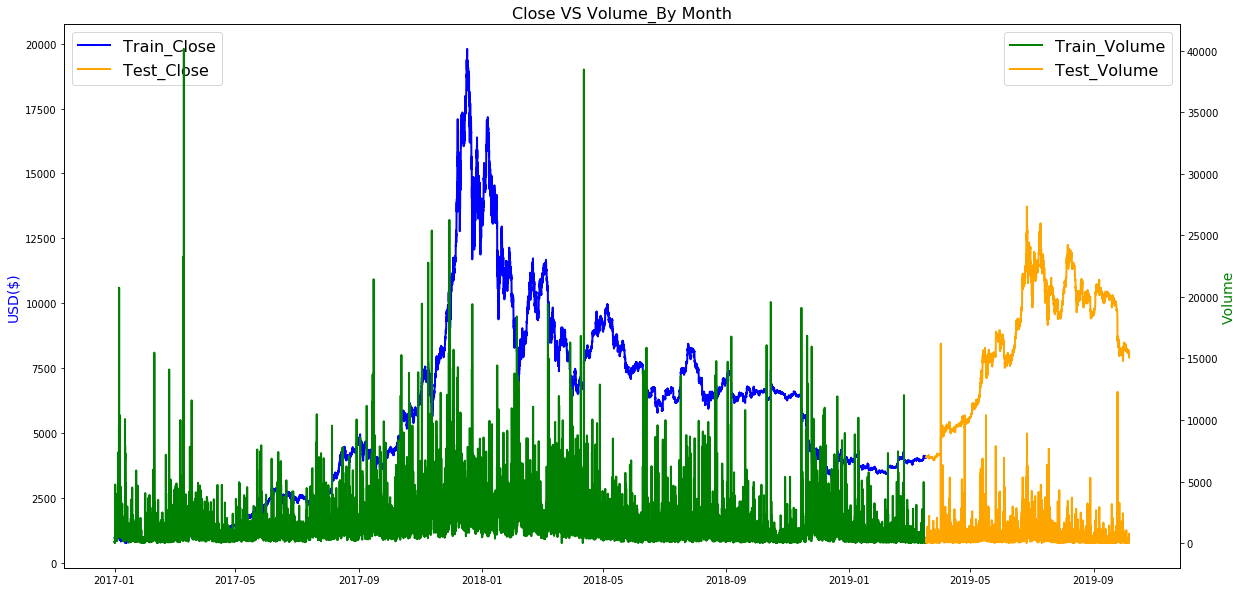

In [24]:
plot_graph_2(train_set['Close'],test_set['Close'],train_set['Volume'],test_set['Volume'],'Train_Close','Test_Close','Train_Volume','Test_Volume',title='Close VS Volume_By Month')

In [0]:
features = [i for i in pd_btc.columns if i != 'Close']
target = ['Close']

In [0]:
#normalizing to change the values of numeric columns in the dataset to a common scale
def normalise_zero_base(df):
    return df / df.iloc[0] - 1
  
def normalise_min_max(df):
    return (df - df.min()) / (df.max() - df.min()) 

In [0]:
def extract_window_data(df, window_len=5, zero_base=False):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        else:
            tmp = normalise_min_max(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [0]:
#prepare data to be enter into the neural network
def prepare_data(df,window_len=10,zero_base=False,test_size=0.2):
  train_data, test_data = train_test_split(df, test_size=test_size, shuffle=False)
  X_train = extract_window_data(train_data[features], window_len, zero_base=False)
  X_test = extract_window_data(test_data[features], window_len, zero_base=False)
  y_train = train_data[target][window_len:].values
  y_test = test_data[target][window_len:].values
  if zero_base:
    y_train = y_train / train_data[target][:-window_len].values - 1
    y_test = y_test / test_data[target][:-window_len].values - 1
  else:
    y_train = normalise_min_max(y_train)
    y_test = normalise_min_max(y_test)

  return train_data, test_data, X_train, X_test, y_train, y_test

In [0]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear', dropout=dropout, loss='mse' , optimizer='adam'):
  model = Sequential()
  model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
  model.add(Activation(activ_func))
  model.add(Dropout(dropout))
  model.add(Dense(units=output_size))
  model.compile(loss=loss, optimizer=optimizer)
  return model

In [0]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = False
lstm_neurons = 300
epochs = 20
batch_size = 100
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [0]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    pd_btc, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [64]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))

True
True


In [0]:
X_train = np.nan_to_num(X_train, nan=0.0)
X_test = np.nan_to_num(X_test, nan=0.0)

In [66]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))

False
False


In [70]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True, validation_data=(X_test,
                    y_test))

Train on 19351 samples, validate on 4834 samples
Epoch 1/20
19351/19351 [==============================] - 11s 559us/step - loss: 0.0371 - val_loss: 0.1107
Epoch 2/20
19351/19351 [==============================] - 10s 531us/step - loss: 0.0357 - val_loss: 0.1033
Epoch 3/20
19351/19351 [==============================] - 10s 542us/step - loss: 0.0354 - val_loss: 0.1108
Epoch 4/20
19351/19351 [==============================] - 10s 536us/step - loss: 0.0355 - val_loss: 0.0961
Epoch 5/20
19351/19351 [==============================] - 10s 539us/step - loss: 0.0353 - val_loss: 0.1017
Epoch 6/20
19351/19351 [==============================] - 10s 542us/step - loss: 0.0353 - val_loss: 0.1159
Epoch 7/20
19351/19351 [==============================] - 10s 528us/step - loss: 0.0353 - val_loss: 0.1002
Epoch 8/20
19351/19351 [==============================] - 10s 525us/step - loss: 0.0353 - val_loss: 0.1201
Epoch 9/20
19351/19351 [==============================] - 10s 525us/step - loss: 0.0351 - val_l

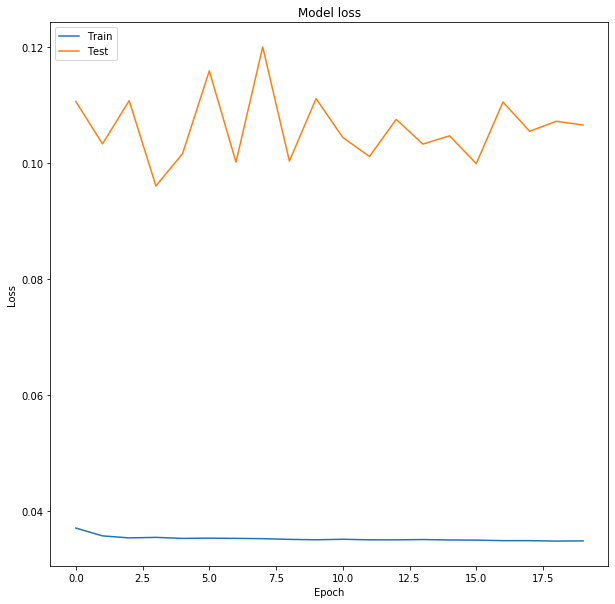

In [72]:
# Visualize the training data
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [71]:
targets = test['Close'][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

0.28594145813793054

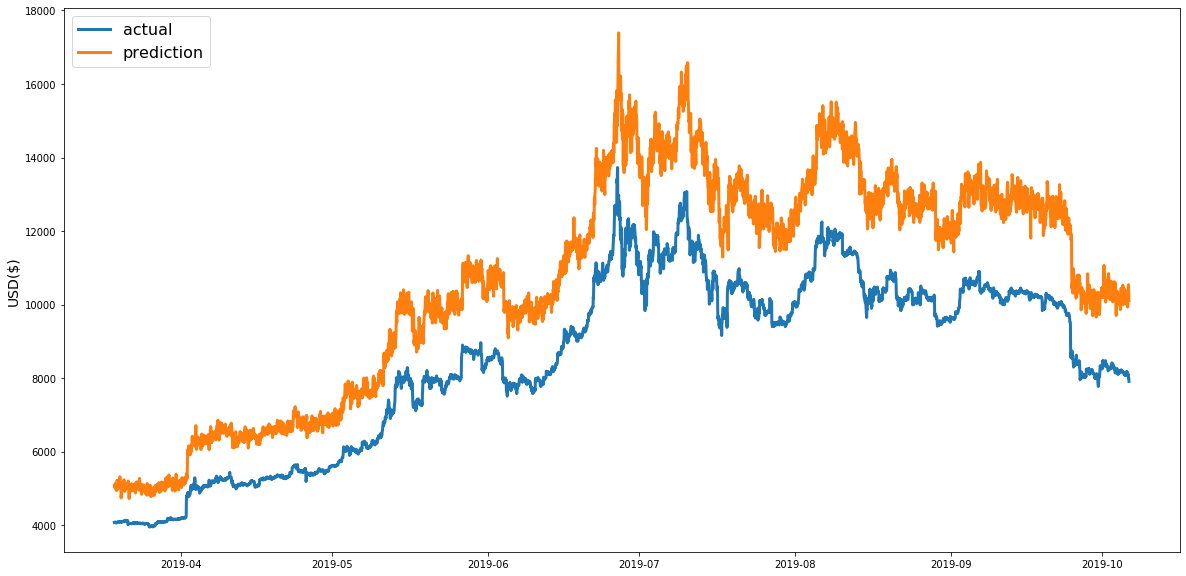

In [73]:
preds = test['Close'].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
plot_graph(targets, preds, 'actual', 'prediction', lw=3)

In [0]:
targets

In [0]:
pd.DataFrame(preds)

In [0]:
preds


In [80]:
y_test.shape

(4834, 1)

In [81]:
train.shape

(19356, 9)

In [69]:
y_train.shape


(19351, 1)

In [82]:
test.shape

(4839, 9)

In [77]:
X_train.shape

(19351, 5, 8)

In [78]:
X_test.shape

(4834, 5, 8)